### [기계학습 중간고사]
목표 : Python과 scikit-learn을 사용하여 클러스터링 분석을 수행하여 데이터에 숨겨진 그룹을 발견

---

#### 0. 클러스터링을 사용하여 해결하고자 하는 자신만의 문제를 정의합니다.

: 경기도 내에서 반려견 문화가 활성화된 지역을 파악하여, `반려견을 키우는 사람들이 이사를 고려할 때 추천할 수 있는 최적의 지역`을 찾고자 합니다.

- 농림축산식품부에 따르면, 우리나라 인구 16명 당 반려견 1마리를 키우고 있으며, 지난해 총 302만마리 등록했다고 합니다. 이를 통해, 우리나라의 반려동물을 기르는 가구가 증가하고 있음을 알 수 있습니다.

- 최근 경기도에 속한 여러 지역들에 방문한 경험이 있습니다. 그리고 방문마다 공통적으로 느낀 점은 반려견이 많다는 것과 반려견 문화가 활성화되어 있다는 것이었습니다.<br>
그리고 내가 반려견을 키우는 상황이라면, 반려견 문화가 활성화된 경기도로 이사를 오고 싶을 것이라 생각했습니다.

- 반려견 문화가 활성화된 경기도 중에서도 가장 최적의 지역을 찾아  그곳이 이사하기 좋은 지역인지 평가함으로써, 반려견을 키우는 사람들이 이사를 고려할 때 장소를 추천하고자 합니다.
- 해당 분석에 대한 결과는 이사 뿐 아니라 반려견 관련 사업을 계획 중인 사업자들에게도 위치 선정에 도움을 줄 수 있으며, 해당 지역은 반려인들에게 지역 홍보를 할 수도 있습니다.

---

#### 1. 환경 구성을 진행합니다.



In [44]:
%pip install seaborn
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [45]:
from pandas import *

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

import seaborn as sns

from sklearn import metrics

import matplotlib.font_manager as fm
font_path = './font/NanumGothic.ttf'
fm.fontManager.addfont(font_path)
plt.rcParams['font.family'] = 'NanumGothic'


---

### 2. 문제해결에 필요한 데이터를 선택합니다.

- 반려견 문화가 활성화가 잘 된 지역의 특징은 아래와 같은 특징을 가질 것이라 생각합니다.
1. 반려견이 많은 지역

2. 반려견 문화 장소가 많은 지역

<br>

- 해당 특성을 설명하는 데이터는 다음과 같습니다.
1. 공공데이터 포털 - 경기도_반려동물 등록 현황.csv [[반려동물 등록 현황 링크]](https://www.data.go.kr/data/15043243/fileData.do) <br><br>
해당 데이터의 경우 지역 별로 등록 동물 수를 알 수 있으며, 반려견이 많은 지역을 알 수 있습니다.

2. 공공데이터 포털 - 한국문화정보원_전국 반려동물 동반 가능 문화시설 위치 데이터.csv [[문화시설 위치 데이터 링크]](https://www.data.go.kr/data/15111389/fileData.do) <br><br>
해당 데이터의 경우 전 지역의 문화 시설 데이터가 나와있는데 지역을 기준으로 분리하면 경기도 지역의 문화 장소 수를 알 수 있습니다.

In [46]:
import os

path = "./"
file_list = os.listdir(path)

print(file_list)

['.git', 'font', 'midterm.ipynb', 'README.md', '경기도반려동물문화시설.csv', '반려동물등록현황.csv']


In [47]:
#경기도_반려동물등록현황 데이터 불러오기
data = read_csv("./반려동물등록현황.csv", encoding = 'cp949')

data.head()

#반려동물등록현황 데이터의 경우 시군구-동 별로 등록 정보가 구분되어 있음
#이 중에서 시군명, 읍면동명, 등록동물수(마리)를 사용

,기준년도,시군명,읍면동명,등록동물수(마리),시군구등록수,대행업체등록수,기타등록수,RFID내장치형수,RFID외부장치형수,RFID인지형수,동물품종수,동물소유자수,소유자등록동물수값,등록대행업체수,데이터기준일자
0,NaN,광명시,가학동,106,6.0,100.0,0.0,59.0,35.0,12.0,20.0,72.0,1.47,0.0,2023-06-30
1,NaN,광명시,광명동,6336,573.0,5763.0,0.0,3333.0,2269.0,735.0,97.0,4831.0,1.31,2.0,2023-06-30
2,NaN,광명시,노온사동,104,11.0,93.0,0.0,60.0,28.0,17.0,21.0,68.0,1.54,0.0,2023-06-30
3,NaN,광명시,소하동,4854,270.0,4584.0,0.0,2878.0,1621.0,355.0,92.0,3719.0,1.30,6.0,2023-06-30
4,NaN,광명시,옥길동,46,0.0,46.0,0.0,26.0,18.0,2.0,12.0,32.0,1.44,0.0,2023-06-30


In [48]:
#문화시설 데이터 불러오기
#해당 데이터의 경우 전국 지역 데이터이기 때문에, 엑셀의 필터 기능을 통해 경기도 지역만 분리하여 아래 이름으로 저장
data2 = read_csv("./경기도반려동물문화시설.csv", encoding = 'cp949')

data2.head()
#문화시설 데이터의 경우 시군구가 구분되어 있음
#지역의 가게 수를 카운트하여 문화시설 수를 사용

,시설명,카테고리,시군구,위도,경도
0,1004 약국,동물약국,고양시,37.644543,126.886336
1,100세건강약국,동물약국,안양시,37.407150,126.914837
2,100세약국,동물약국,수원시,37.276272,127.030911
3,100평 광장약국,동물약국,의정부시,37.751957,127.049286
4,21세기 동규약국,동물약국,오산시,37.146604,127.068648


---

### 3. 데이터를 전처리합니다.

- 반려동물등록현황의 경우, 지역 안에 동별로 구분이 되어 있기 때문에 지역으로 묶어주는 작업을 진행합니다.

- 문화시설 데이터의 경우, 지역 별로 개수를 카운트하는 작업을 진행합니다.

In [49]:
#동물등록현황 데이터 시군구 종류 리스트 만들기
data_local = data[['시군명']].values.tolist()
data_local = sum(data_local, [])
data_local = list(set(data_local))

#시군구 개수 출력
print(len(data_local))

#시군구 종류 리스트 출력
print(data_local)

#임시 리스트 생성
local_pet_sum = []

#지역별로 등록동물 수 합계 내기
for i in range(len(data_local)):
    local_pet_sum.append(data[data['시군명'] == data_local[i]]['등록동물수(마리)'].sum())

#데이터 프레임 만들기
df1 = DataFrame({'지역':data_local, '동물 수 합계':local_pet_sum})

#각 지역별 동물 수 합계가 담긴 데이터 프레임 출력
df1.head()

27
['고양시', '김포시', '부천시', '남양주시', '과천시', '오산시', '군포시', '양평군', '포천시', '성남시', '평택시', '연천군', '수원시', '안성시', '양주시', '여주시', '광명시', '구리시', '의정부시', '안산시', '용인시', '동두천시', '화성시', '시흥시', '파주시', '하남시', '가평군']


,지역,동물 수 합계
0,고양시,189464
1,김포시,12093
2,부천시,16779
3,남양주시,32052
4,과천시,1249


In [50]:
#문화시설 시군구 종류 리스트 만들기
local_list = list(set(data2['시군구']))

#시군구 개수 출력
print(len(local_list))

#시군구 출력
print(local_list)

#카테고리 리스트 만들기
shop_list = list(set(data2['카테고리']))

#카테고리 리스트 개수 세기
print(len(shop_list))

#카테고리 리스트 출력
print(shop_list)

31
['고양시', '김포시', '부천시', '의왕시', '남양주시', '오산시', '과천시', '군포시', '이천시', '안양시', '양평군', '포천시', '성남시', '광주시', '평택시', '연천군', '수원시', '안성시', '양주시', '여주시', '광명시', '구리시', '의정부시', '안산시', '용인시', '화성시', '동두천시', '시흥시', '파주시', '하남시', '가평군']
12
['박물관', '문예회관', '펜션', '동물약국', '카페', '식당', '위탁관리', '반려동물용품', '미용', '미술관', '여행지', '동물병원']


In [51]:
#카테고리별 임시 리스트
tp1 = []
tp2 = []
tp3 = []
tp4 = []
tp5 = []
tp6 = []
tp7 = []
tp8 = []
tp9 = []
tp10 = []
tp11 = []
tp12 = []
tp13 = []

#지역별, 카테고리 별 개수 세기 
for i in range(len(local_list)):
    tmp_df = data2[data2['시군구'] == local_list[i]] #지역 개수만큼
    tp1.append(len(tmp_df[tmp_df['카테고리'] == shop_list[0]])) #식당 수
    tp2.append(len(tmp_df[tmp_df['카테고리'] == shop_list[1]])) #문예회관 수
    tp3.append(len(tmp_df[tmp_df['카테고리'] == shop_list[2]])) #미술관 수
    tp4.append(len(tmp_df[tmp_df['카테고리'] == shop_list[3]])) #여행지 수
    tp5.append(len(tmp_df[tmp_df['카테고리'] == shop_list[4]])) #위탁관리 수
    tp6.append(len(tmp_df[tmp_df['카테고리'] == shop_list[5]])) #동물약국 수
    tp7.append(len(tmp_df[tmp_df['카테고리'] == shop_list[6]])) #박물관 수
    tp8.append(len(tmp_df[tmp_df['카테고리'] == shop_list[7]])) #카페 수
    tp9.append(len(tmp_df[tmp_df['카테고리'] == shop_list[8]])) #펜션 수
    tp10.append(len(tmp_df[tmp_df['카테고리'] == shop_list[9]])) #동물병원 수
    tp11.append(len(tmp_df[tmp_df['카테고리'] == shop_list[10]])) #미용 수
    tp12.append(len(tmp_df[tmp_df['카테고리'] == shop_list[11]])) #반려용품 수
    tp13.append(len(tmp_df))

#해당 리스트 담은 데이터 프레임 만들기
df2 = DataFrame({'지역':local_list, '식당':tp1, '문예회관':tp2, '미술관':tp3, '여행지':tp4, '위탁관리':tp5, '동물약국':tp6, '박물관':tp7, 
                '카페':tp8,'펜션':tp9, '동물병원':tp10, '미용':tp11, '반려용품':tp12, '문화시설 수':tp13})

 
#데이터 프레임 출력
df2.head() 

,지역,식당,문예회관,미술관,여행지,위탁관리,동물약국,박물관,카페,펜션,동물병원,미용,반려용품,문화시설 수
0,고양시,9,3,0,226,24,1,1,150,58,2,2,99,575
1,김포시,3,1,1,88,6,0,0,79,28,2,2,40,250
2,부천시,6,2,0,192,11,0,0,86,40,0,4,65,406
3,의왕시,2,0,0,23,1,0,0,9,9,1,1,14,60
4,남양주시,7,1,3,142,26,1,0,122,38,3,8,51,402


In [52]:
#지역을 기준으로 두 개를 묶어 데이터셋 만들기
dataset = merge(df2, df1, how = "inner", on = "지역")

#데이터셋 출력
dataset.head()

,지역,식당,문예회관,미술관,여행지,위탁관리,동물약국,박물관,카페,펜션,동물병원,미용,반려용품,문화시설 수,동물 수 합계
0,고양시,9,3,0,226,24,1,1,150,58,2,2,99,575,189464
1,김포시,3,1,1,88,6,0,0,79,28,2,2,40,250,12093
2,부천시,6,2,0,192,11,0,0,86,40,0,4,65,406,16779
3,남양주시,7,1,3,142,26,1,0,122,38,3,8,51,402,32052
4,오산시,2,1,0,48,0,0,1,19,5,1,2,15,94,5599


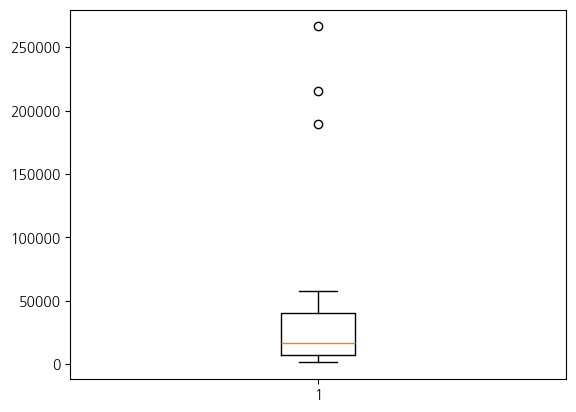

In [53]:
#이상치 확인

#동물 수 합계를 기준으로 확인
plt.boxplot(dataset['동물 수 합계'])
plt.show()

#박스플롯을 통해 이상치를 확인
#3개의 이상치를 확인할 수 있음

In [54]:
#이상치 제거
result_data = dataset[dataset['동물 수 합계'] <= 100000]

#이상치 제거 후 데이터 확인
result_data.head()

,지역,식당,문예회관,미술관,여행지,위탁관리,동물약국,박물관,카페,펜션,동물병원,미용,반려용품,문화시설 수,동물 수 합계
1,김포시,3,1,1,88,6,0,0,79,28,2,2,40,250,12093
2,부천시,6,2,0,192,11,0,0,86,40,0,4,65,406,16779
3,남양주시,7,1,3,142,26,1,0,122,38,3,8,51,402,32052
4,오산시,2,1,0,48,0,0,1,19,5,1,2,15,94,5599
5,과천시,4,1,0,7,0,0,0,3,1,2,1,10,29,1249


In [55]:
#클러스터링을 위해 데이터 준비
X = result_data

#범주형 데이터 사용을 위해 인코딩 진행
X = get_dummies(data = X, columns = ["지역"])

#인코딩 진행된 데이터 확인
X.head()

,식당,문예회관,미술관,여행지,위탁관리,동물약국,박물관,카페,펜션,동물병원,...,지역_양평군,지역_여주시,지역_연천군,지역_오산시,지역_의정부시,지역_파주시,지역_평택시,지역_포천시,지역_하남시,지역_화성시
1,3,1,1,88,6,0,0,79,28,2,...,False,False,False,False,False,False,False,False,False,False
2,6,2,0,192,11,0,0,86,40,0,...,False,False,False,False,False,False,False,False,False,False
3,7,1,3,142,26,1,0,122,38,3,...,False,False,False,False,False,False,False,False,False,False
4,2,1,0,48,0,0,1,19,5,1,...,False,False,False,True,False,False,False,False,False,False
5,4,1,0,7,0,0,0,3,1,2,...,False,False,False,False,False,False,False,False,False,False


---

### 4. Elbow을 통해 적당한 클러스터 수를 정합니다.

- 급격하게 감소하는 구간을 찾아 사용합니다.

- 그래프의 결과를 통해 `2~4` 정도를 적당하다는 걸 알 수 있습니다.
- 이번 클러스터링에서는 `3` 을 사용합니다.

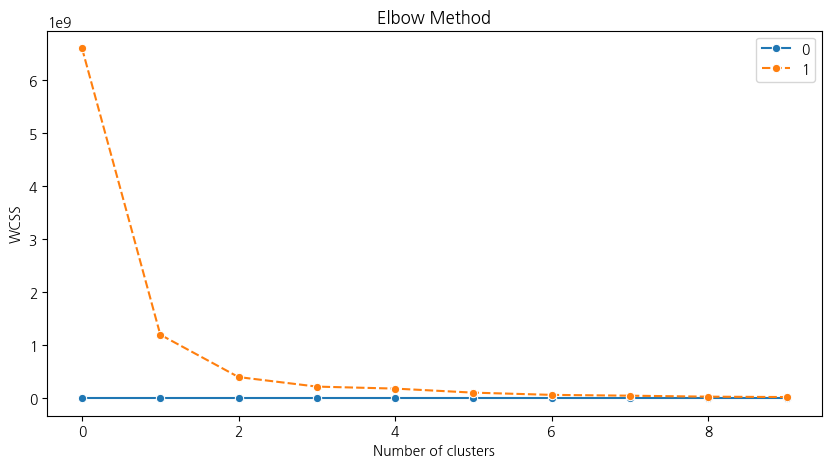

In [56]:
#리스트 생성
wcss = []

# 1부터 10까지의 클러스터 수에 대해 K-평균 클러스터링을 수행
for i in range(1, 11): 
    
    #KMeans 클러스터링 모델을 초기화 
    #i는 클러스터 수 
    #초기 중심점 선택 방법은 k-means++
    #랜덤 상태 고정
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X) #X를 클러스터링
    wcss.append(kmeans.inertia_) # inertia_ 속성을 통해 WCSS 값을 구하여 리스트에 추가

#그래프 설정
plt.figure(figsize=(10,5))
sns.lineplot(data=(range(1, 11), wcss), marker='o', color='red')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

#그래프 출력
plt.show()


---

### 5. 클러스터링을 진행합니다.

- 클러스터 0는 `반려견의 수가 많고 문화장소의 수도 많아`, 반려견과 관련된 활동이 `활발한 지역`으로 해석할 수 있습니다.
- 클러스터 1은 반려견의 수가 `중간` 정도지만 문화장소의 수가 `많은` 것으로 보입니다.
- 클러스터 2은 반려견의 수가 `적은` 편이며, 문화장소의 수도 상대적으로 `적습니다`.

- 즉, 반려인에게 이사장소로 추천하는 지역은 `클러스터 1` 지역입니다.
- 클러스터1에 해당하는 지역은 `포천시, 화성시, 평택시, 가평군` 입니다.
- 클러스터1 중에서도 `포천시`가 가장 좋은 지역이라고 볼 수 있습니다.

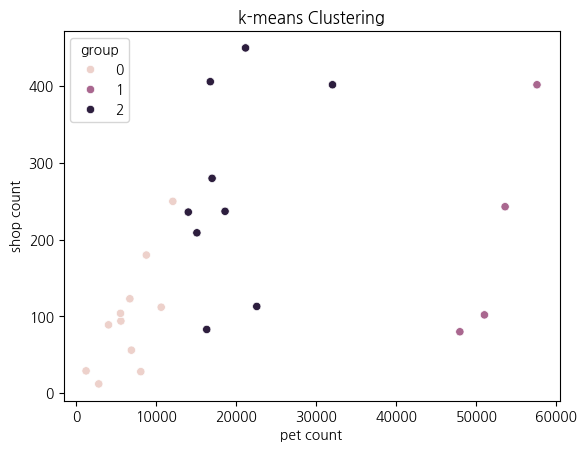

In [57]:
# KMeans 모델 생성 및 훈련
kmeans = KMeans(n_clusters = 3, random_state = 0)
kmeans.fit(X)

# 각 데이터 포인트의 클러스터 레이블 예측
labels = kmeans.predict(X)

result_data["group"] = labels

# Scatter plot 그리기
sns.scatterplot(x = "동물 수 합계", y = "문화시설 수", data = result_data, hue = "group")

# x축 및 y축 라벨 설정
plt.title('k-means Clustering')
plt.xlabel("pet count")
plt.ylabel("shop count")

# 그래프 출력
plt.show()

In [58]:
#반려견과 관련된 활동이 활발한 지역
good_list = result_data[result_data["group"] == 1]

good_list

,지역,식당,문예회관,미술관,여행지,위탁관리,동물약국,박물관,카페,펜션,동물병원,미용,반려용품,문화시설 수,동물 수 합계,group
8,포천시,6,1,18,9,5,0,3,33,4,0,5,18,102,51043,1
10,평택시,0,3,0,75,12,0,1,57,42,0,5,48,243,53627,1
21,화성시,4,3,0,138,10,0,0,117,53,2,7,68,402,57612,1
26,가평군,0,1,33,10,5,0,0,10,2,4,6,9,80,47972,1


---

### 6. 실루엣 점수를 통해 평가를 진행합니다.

- 실루엣 점수는 `0.63` 으로 좋은 점수가 나왔습니다.

In [59]:
# Silhouette Score 계산
score = metrics.silhouette_score(X, labels)
print(f"Silhouette Score: {score}")

Silhouette Score: 0.6370711147214926


---

### 7. 클러스터1 그룹의 각 지역을 분석합니다.

- 포천시의 경우, `동물약국, 여행지, 미용`의 수가 적습니다. 포천시에서 문화시설 사업을 고려 중이라면, 반려견 동반이 가능한 동물약국, 여행지, 미용 카테고리를 선택하는 것이 좋습니다.

- 화성시의 경우, `식당, 여행지, 위탁관리`의 수가 적습니다. 포천시에서 문화시설 사업을 고려 중이라면, 반려견 동반이 가능한 식당, 여행지, 위탁관리 카테고리를 선택하는 것이 좋습니다.
- 평택시의 경우, `식당, 여행지, 동물약국, 박물관의 수`의 수가 적습니다. 포천시에서 문화시설 사업을 고려 중이라면, 반려견 동반이 가능한 식당, 여행지, 동물약국, 박물관 카테고리를 선택하는 것이 좋습니다.
- 평택시의 경우, `여행지, 위탁관리, 박물관, 미용의 수`의 수가 적습니다. 포천시에서 문화시설 사업을 고려 중이라면, 반려견 동반이 가능한 여행지, 위탁관리, 박물관, 미용 카테고리를 선택하는 것이 좋습니다.

In [60]:
good_local_list = ['포천시', '화성시', '평택시', '가평군']

good_list.drop(columns = ['지역', '문화시설 수', '동물 수 합계', 'group'], inplace = True)

good_list.index = [1, 2, 3, 4]
 
columns = list(good_list.columns)

good_list

,식당,문예회관,미술관,여행지,위탁관리,동물약국,박물관,카페,펜션,동물병원,미용,반려용품
1,6,1,18,9,5,0,3,33,4,0,5,18
2,0,3,0,75,12,0,1,57,42,0,5,48
3,4,3,0,138,10,0,0,117,53,2,7,68
4,0,1,33,10,5,0,0,10,2,4,6,9


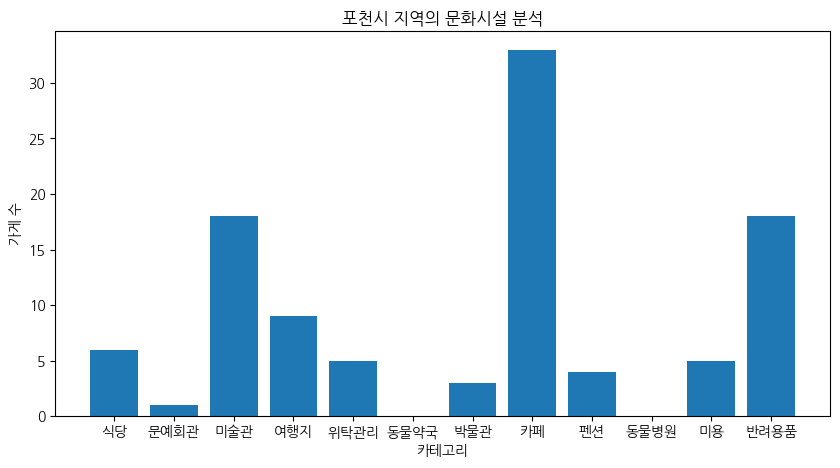

In [61]:
#포천시 문화시설 분석 차트
plt.figure(figsize=(10, 5))
plt.bar(columns, good_list.iloc[0])
plt.title(good_local_list[0] + " 지역의 문화시설 분석")
plt.xlabel('카테고리')
plt.ylabel('가게 수')
plt.show()

#포천시의 경우, 동물약국, 여행지, 미용의 수가 적음. 포천시에서 문화시설 사업을 고려 중이라면, 동물약국, 여행지, 미용 카테고리를 선택하는 것이 좋음

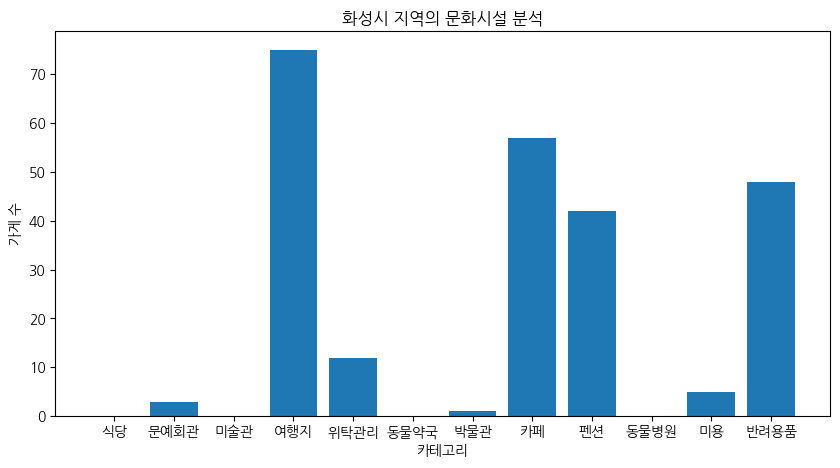

In [62]:
#화성시 문화시설 분석 차트
plt.figure(figsize=(10, 5))
plt.bar(columns, good_list.iloc[1])
plt.title(good_local_list[1] + " 지역의 문화시설 분석")
plt.xlabel('카테고리')
plt.ylabel('가게 수')
plt.show()

#화성시의 경우, 식당, 여행지, 위탁관리의 수가 적음. 화성시에서 문화시설 사업을 고려 중이라면, 반려견 동반이 가능한 식당, 여행지, 위탁관리 카테고리를 선택하는 것이 좋음

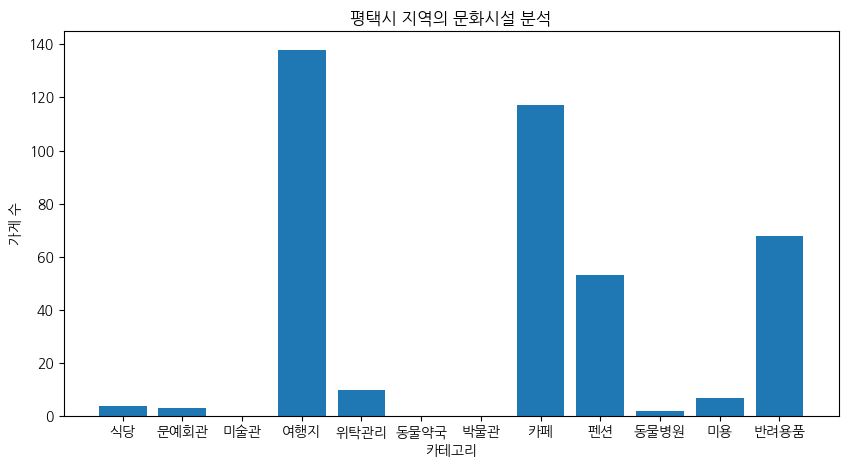

In [63]:
#평택시 문화시설 분석 차트
plt.figure(figsize=(10, 5))
plt.bar(columns, good_list.iloc[2])
plt.title(good_local_list[2] + " 지역의 문화시설 분석")
plt.xlabel('카테고리')
plt.ylabel('가게 수')
plt.show()

#평택시의 경우, 식당, 여행지, 동물약국, 박물관의 수가 적음. 평택시에서 문화시설 사업을 고려 중이라면, 반려견 동반이 가능한 식당, 여행지, 동물약국, 박물관 카테고리를 선택하는 것이 좋음

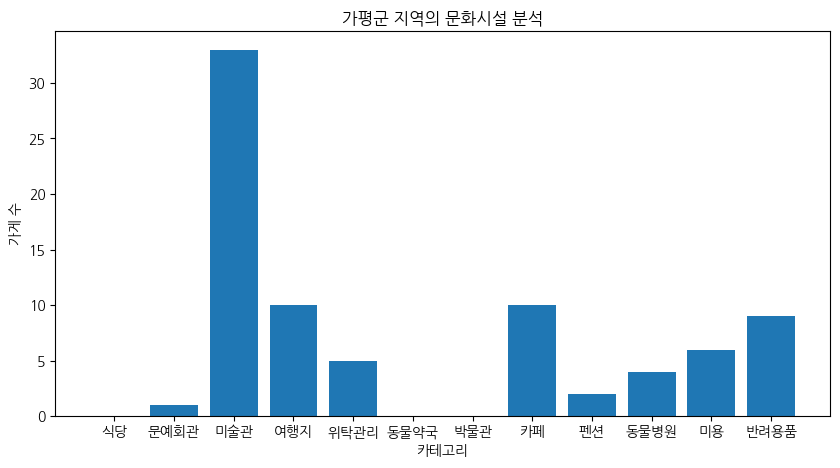

In [64]:
#가평군 문화시설 분석 차트
plt.figure(figsize=(10, 5))
plt.bar(columns, good_list.iloc[3])
plt.title(good_local_list[3] + " 지역의 문화시설 분석")
plt.xlabel('카테고리')
plt.ylabel('가게 수')
plt.show()

#가평군의 경우, 여행지, 위탁관리, 박물관, 미용의 수가 적음. 가평군에서 문화시설 사업을 고려 중이라면, 반려견 동반이 가능한 여행지, 위탁관리, 박물관, 미용 카테고리를 선택하는 것이 좋음